<a href="https://colab.research.google.com/github/JsteReubsSoftware/COS711-Assignment-2/blob/main/u21457060_cos711_a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Author: Reuben Jooste

Student No: u21457060

### Assignment 2 - Almond Type Classification
During this notebook we will implement and compare a few gradient-based algorithms for training a simple neural network (NN).

**Chosen Algorithms:**
- Stochastic Gradient-based Descent (SGD)
- Resilient Back propagation (RProp)
- Adaptive Moment Estimation (Adam)

**Dataset:**

We will make use of the dataset found [here](https://www.kaggle.com/datasets/sohaibmoradi/almond-types-classification). The dataset consists of the following information:
- 14 Features (see above link for more information on the different features)
- 2803 Records/Rows

# Library Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats

# Data Pre-processing
### Load the dataset

In [ ]:
raw_data = pd.read_csv('/kaggle/input/almond-types-classification/Almond.csv')
raw_data.head()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA
1,1,NaN,234.188126,128.199509,23038.0,680.984841,NaN,0.957304,1.601844,NaN,NaN,0.656353,24065.5,MAMRA
2,2,NaN,229.418610,125.796547,22386.5,646.943212,NaN,0.967270,1.487772,NaN,NaN,0.683620,23144.0,MAMRA
3,3,NaN,232.763153,125.918808,22578.5,661.227483,NaN,0.965512,1.540979,NaN,NaN,0.685360,23385.0,MAMRA
4,4,NaN,230.150742,107.253448,19068.0,624.842706,NaN,0.951450,1.629395,NaN,NaN,0.714800,20041.0,MAMRA


In [ ]:
raw_data.shape

(2803, 14)

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

In [ ]:
# Analyze descriptive statistics
raw_data.describe()

,Unnamed: 0,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area)
count,2803.000000,1946.000000,1861.000000,1799.000000,2803.000000,2803.000000,1946.000000,2803.000000,2803.000000,1004.000000,1004.000000,2803.000000,2803.000000
mean,1401.000000,290.609274,171.025915,109.705378,26511.117374,743.863770,0.470466,0.955828,1.825233,1.753216,0.813114,0.724587,27696.218159
std,809.300727,62.719433,29.916529,18.940597,13782.561344,230.632076,0.118673,0.039596,0.794058,0.206616,0.041312,0.047474,14237.347610
min,0.000000,151.335266,88.050529,59.494278,6037.000000,311.563489,0.173748,0.718772,1.164469,1.400082,0.699897,0.454538,6355.000000
25%,700.500000,245.966293,149.453659,97.091682,16211.500000,571.730009,0.384810,0.944579,1.357398,1.612490,0.784476,0.701673,17088.500000
50%,1401.000000,279.879883,170.168365,110.280136,23440.500000,707.487369,0.472718,0.970422,1.576412,1.705716,0.810120,0.733720,24589.000000
75%,2101.500000,330.508575,190.640427,121.392773,33451.000000,878.896530,0.577553,0.981484,1.965953,1.833339,0.838141,0.757551,34863.250000
max,2802.000000,515.352478,258.569794,181.845200,89282.000000,1864.947387,0.697293,0.992889,9.660057,2.731251,0.930563,0.845813,90642.500000


In [ ]:
# We can drop the column named 'Unnamed: 0' since it has no value to us because it represents the row numbers
raw_data.drop('Unnamed: 0', axis=1, inplace=True)
raw_data.head(1)

,Length (major axis),Width (minor axis),Thickness (depth),Area,Perimeter,Roundness,Solidity,Compactness,Aspect Ratio,Eccentricity,Extent,Convex hull(convex area),Type
0,NaN,227.940628,127.759132,22619.0,643.813269,NaN,0.973384,1.458265,NaN,NaN,0.681193,23237.5,MAMRA


In [ ]:
# Visualize distribution of unclean data
def plot_distributions(data):
    # Set the plot style
    sns.set(style='whitegrid')

    # Separate numeric and categorical columns
    numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns

    # Calculate the total number of plots
    total_plots = len(numeric_columns) + len(categorical_columns)

    # Set the size of the plot
    plt.figure(figsize=(16, 12))

    # Plot histograms for numeric columns
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(4, 4, i)
        sns.histplot(data[column].dropna(), kde=True)
        plt.title(f'Distribution of {column}')

    # Plot bar plots for categorical columns
    for j, column in enumerate(categorical_columns, len(numeric_columns) + 1):
        plt.subplot(4, 4, j)
        sns.countplot(y=data[column], palette='Set2', order=data[column].value_counts().index)
        plt.title(f'Frequency of {column}')

    # Adjust the layout to avoid overlap
    plt.tight_layout()
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

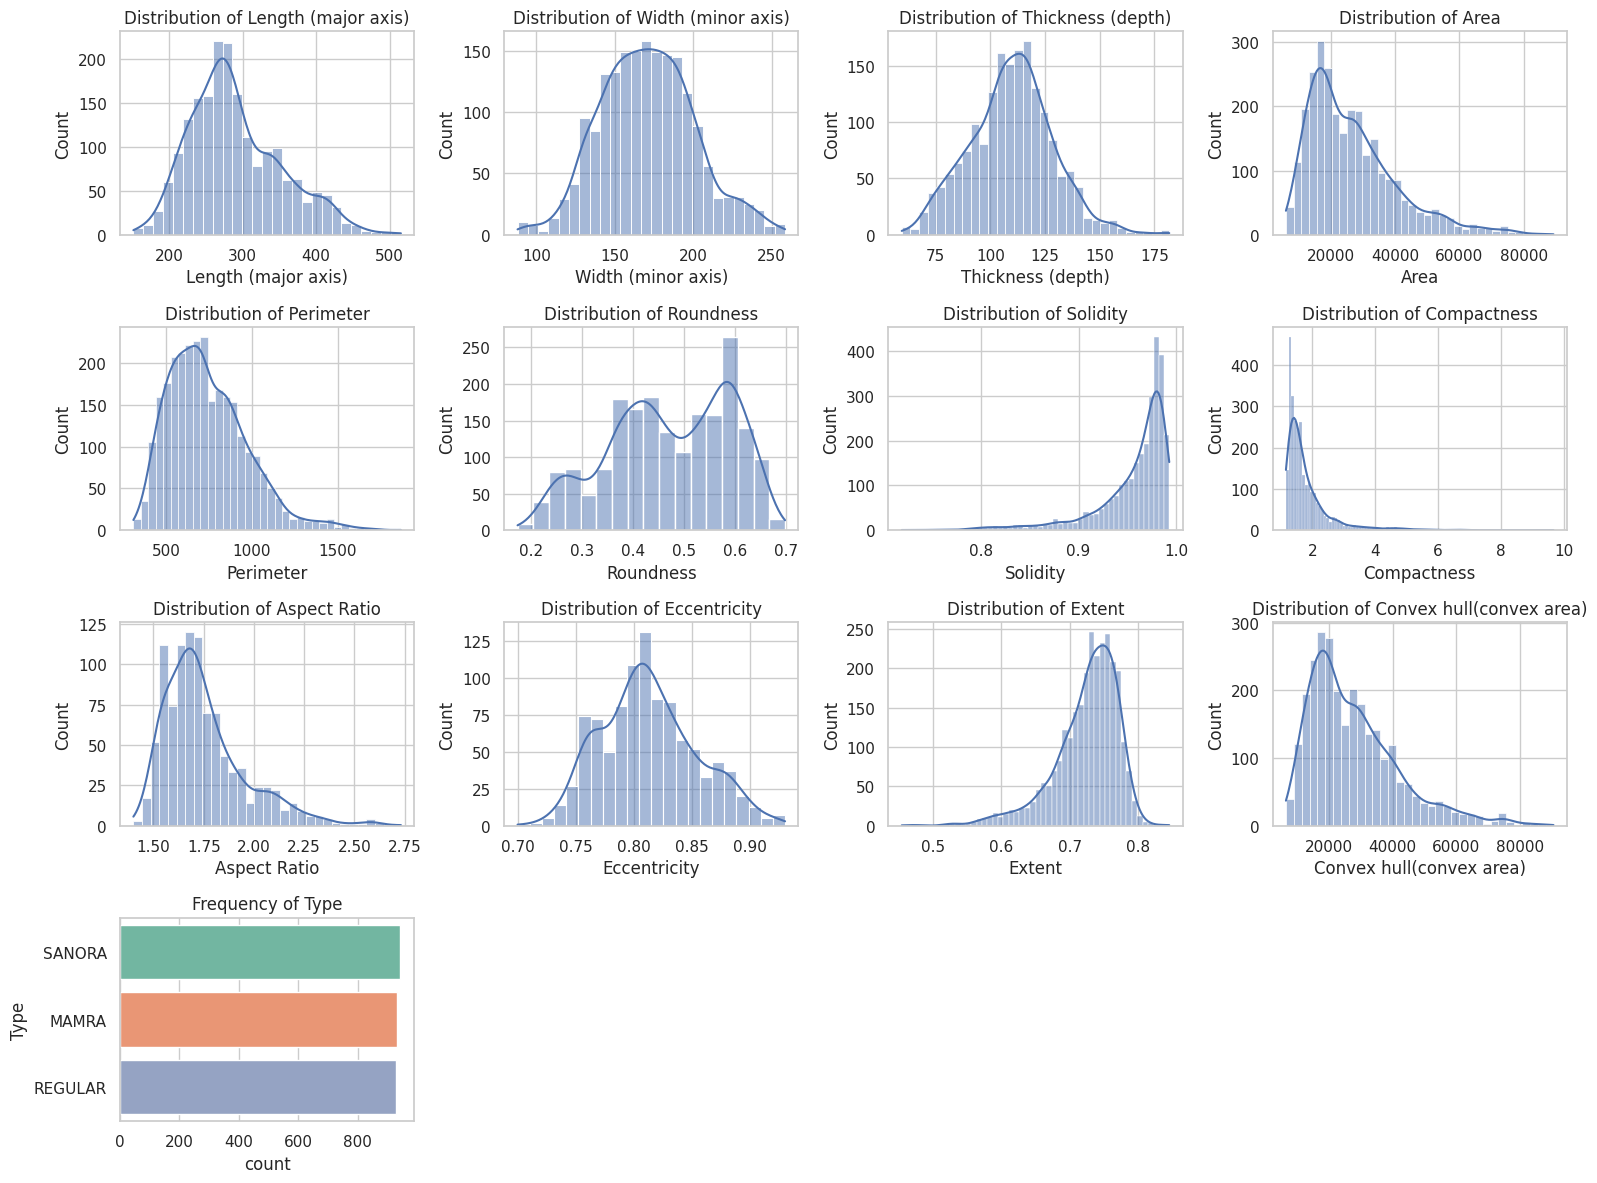

In [ ]:
# plot histograms
plot_distributions(raw_data)

This grid above shows a clear visualization of the different features' distribution. We note that some feature have a normal distribution while other are either skewed to the right or skewed to the left. Using this information, we are able to decide whether or not to replace missing values with the mean of the respective feature (if the data has a Gaussian distribution) or to replace them using the median of the respective feature (if the data is skewed).

In [ ]:
# Analyze te number of occurrences for the Type attribute
raw_data['Type'].value_counts()

Type
SANORA     943
MAMRA      933
REGULAR    927
Name: count, dtype: int64

The CLASS variable for our classification problem seems to be relatively balanced which is good. However, when using Cross-Validation we will again need to analyze it to determine whether or not our training data is unbalanced or not.

### Analyzing outliers

In [ ]:
raw_data.select_dtypes(include=[np.number]).columns

Index(['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)',
       'Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness',
       'Aspect Ratio', 'Eccentricity', 'Extent', 'Convex hull(convex area)'],
      dtype='object')

In [ ]:
def plot_boxplots(data):
    # Identify numeric and categorical columns
    num_cols = data.select_dtypes(include=[np.number]).columns

    # Calculate the number of rows and columns for the grid
    num_cols_total = len(num_cols)
    num_rows = (num_cols_total + 2) // 3  # Adding 2 to round up to the next integer if not perfectly divisible

    # Create a figure with subplots
    fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    axs = axs.flatten()  # Flatten the array of axes to easily index

    for i, col in enumerate(num_cols):
        sns.boxplot(data[col], ax=axs[i])
        axs[i].set_title(f'Boxplot of {col}')
        axs[i].set_xlabel(col)

    # Hide any extra subplots
    for j in range(num_cols_total, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

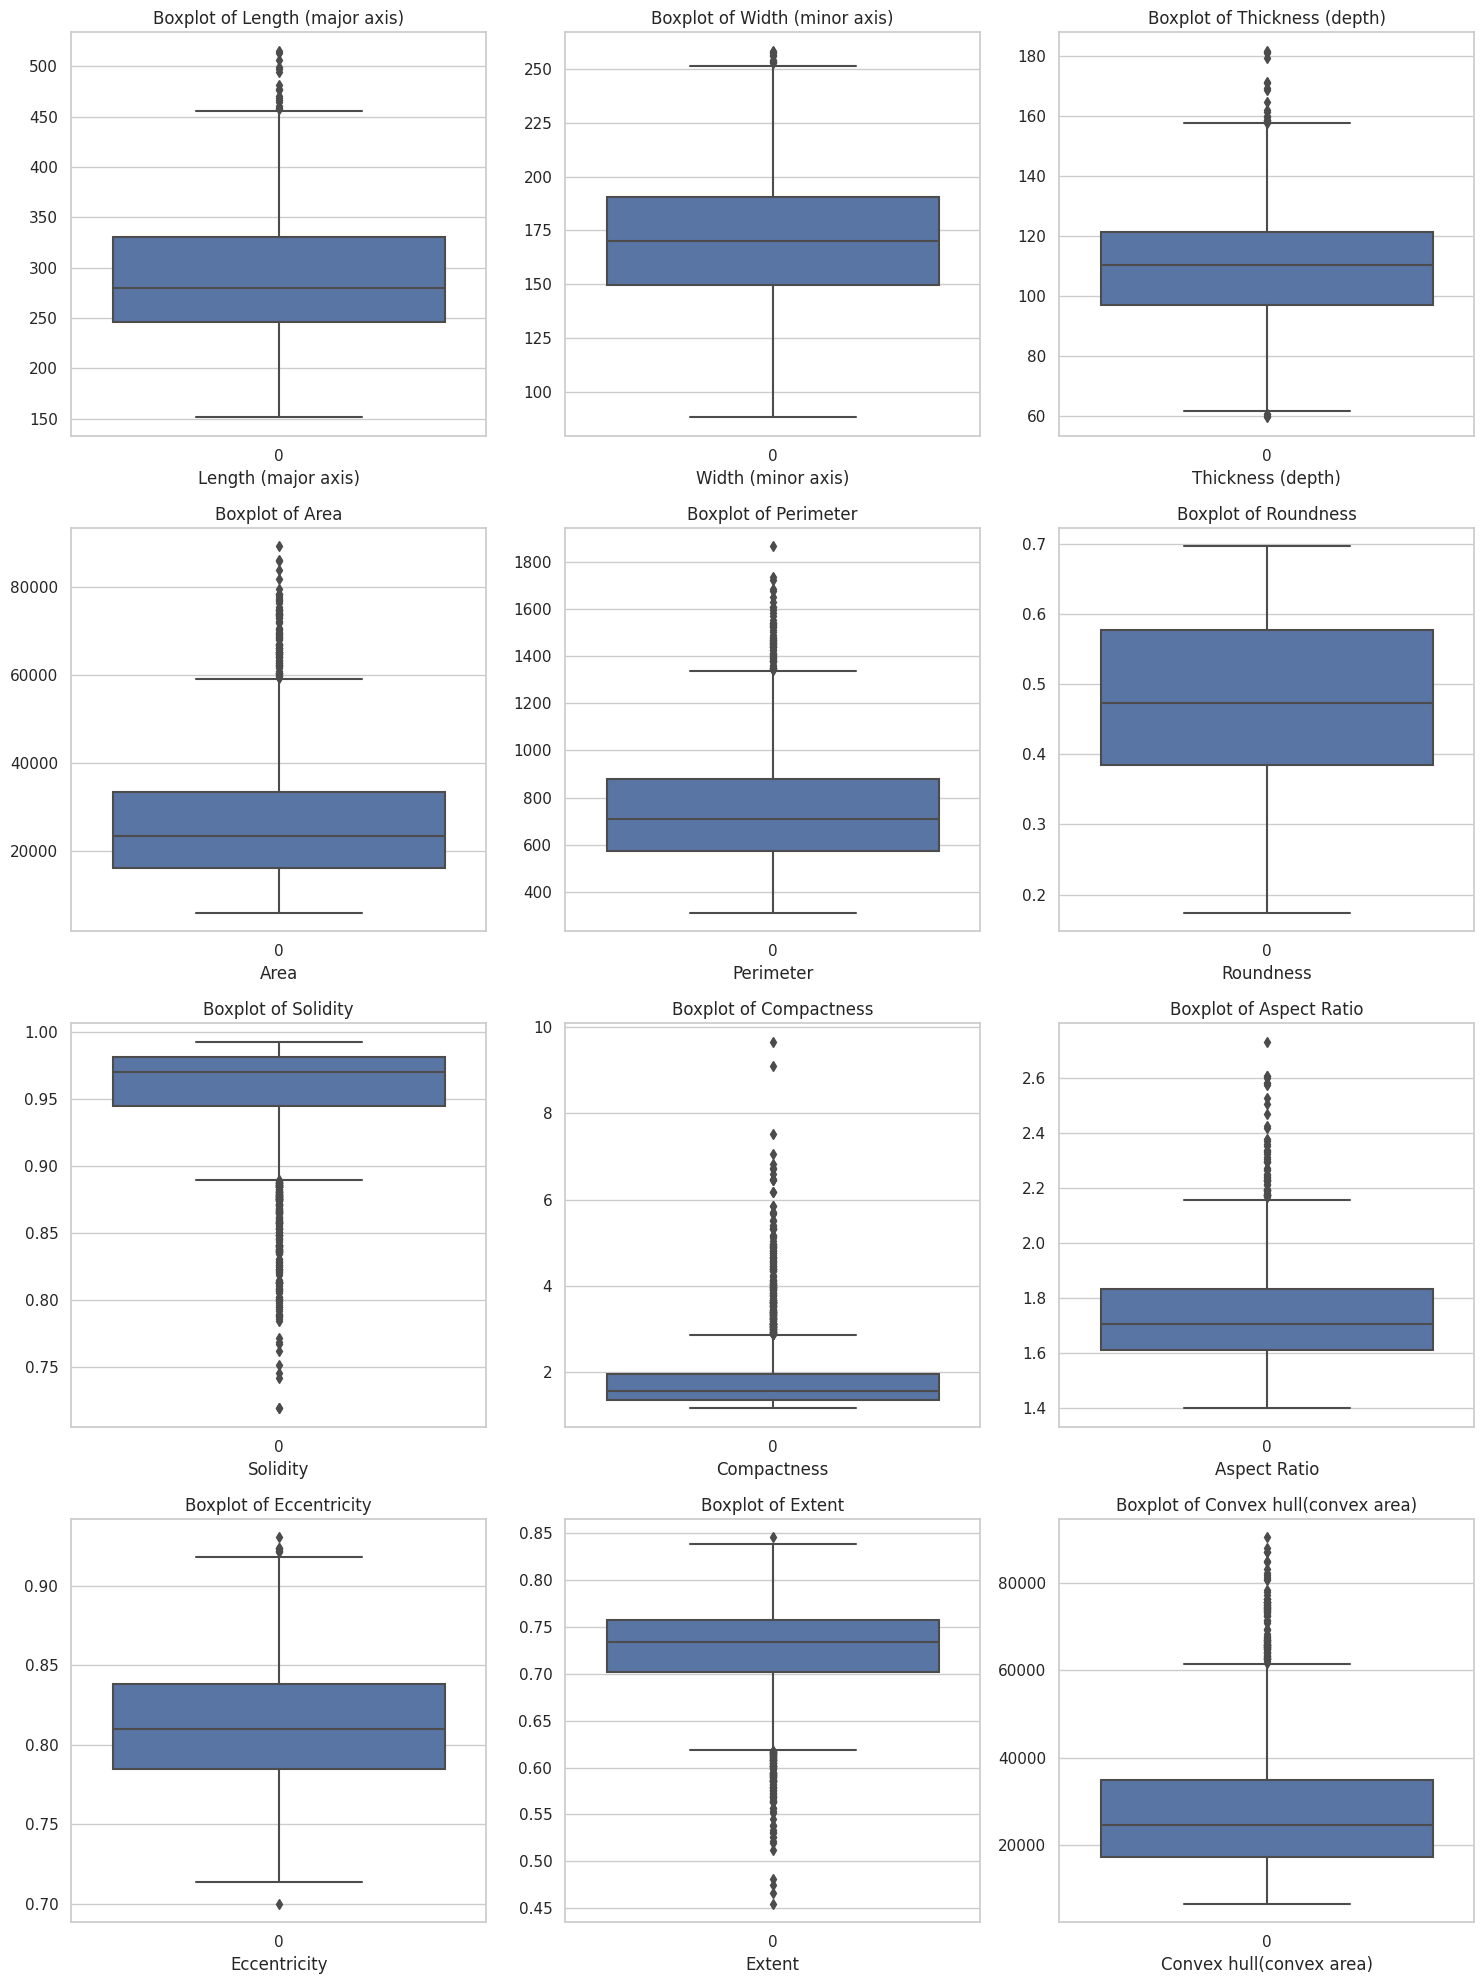

In [ ]:
plot_boxplots(raw_data)

From the Boxplots above we note the skew distributions however, there seems to be some outliers within some of the features. We can make use of the Z-Score or interquartile range (IQR) to remove these outliers or replace them with the median (depending on how many outliers there are).

### Handling missing values and outliers

In [ ]:
raw_data.isna().sum() # view number of missing values for each feature

Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

In [ ]:
def clean_missing_values(data):
    # handle missing values
    data['Length (major axis)'] = data['Length (major axis)'].fillna(data['Length (major axis)'].mean())
    data['Width (minor axis)'] = data['Width (minor axis)'].fillna(data['Width (minor axis)'].mean())

    data['Thickness (depth)'] = data['Thickness (depth)'].fillna(data['Thickness (depth)'].mean())
    data['Roundness'] = data['Roundness'].fillna(4 * data['Area'] / ( np.pi * data['Length (major axis)'] ** 2))

    data['Aspect Ratio'] = data['Aspect Ratio'].fillna(data['Length (major axis)'] / data['Width (minor axis)'])
    data['Eccentricity'] = data['Eccentricity'].fillna(np.sqrt(1 - ( data['Width (minor axis)'] / data['Length (major axis)']) **2 ))

    return data

In [ ]:
no_na_data = clean_missing_values(raw_data.copy())
no_na_data.isna().sum()

/opt/conda/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Length (major axis)          0
Width (minor axis)           0
Thickness (depth)            0
Area                         0
Perimeter                    0
Roundness                    0
Solidity                     0
Compactness                  0
Aspect Ratio                 0
Eccentricity                13
Extent                       0
Convex hull(convex area)     0
Type                         0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

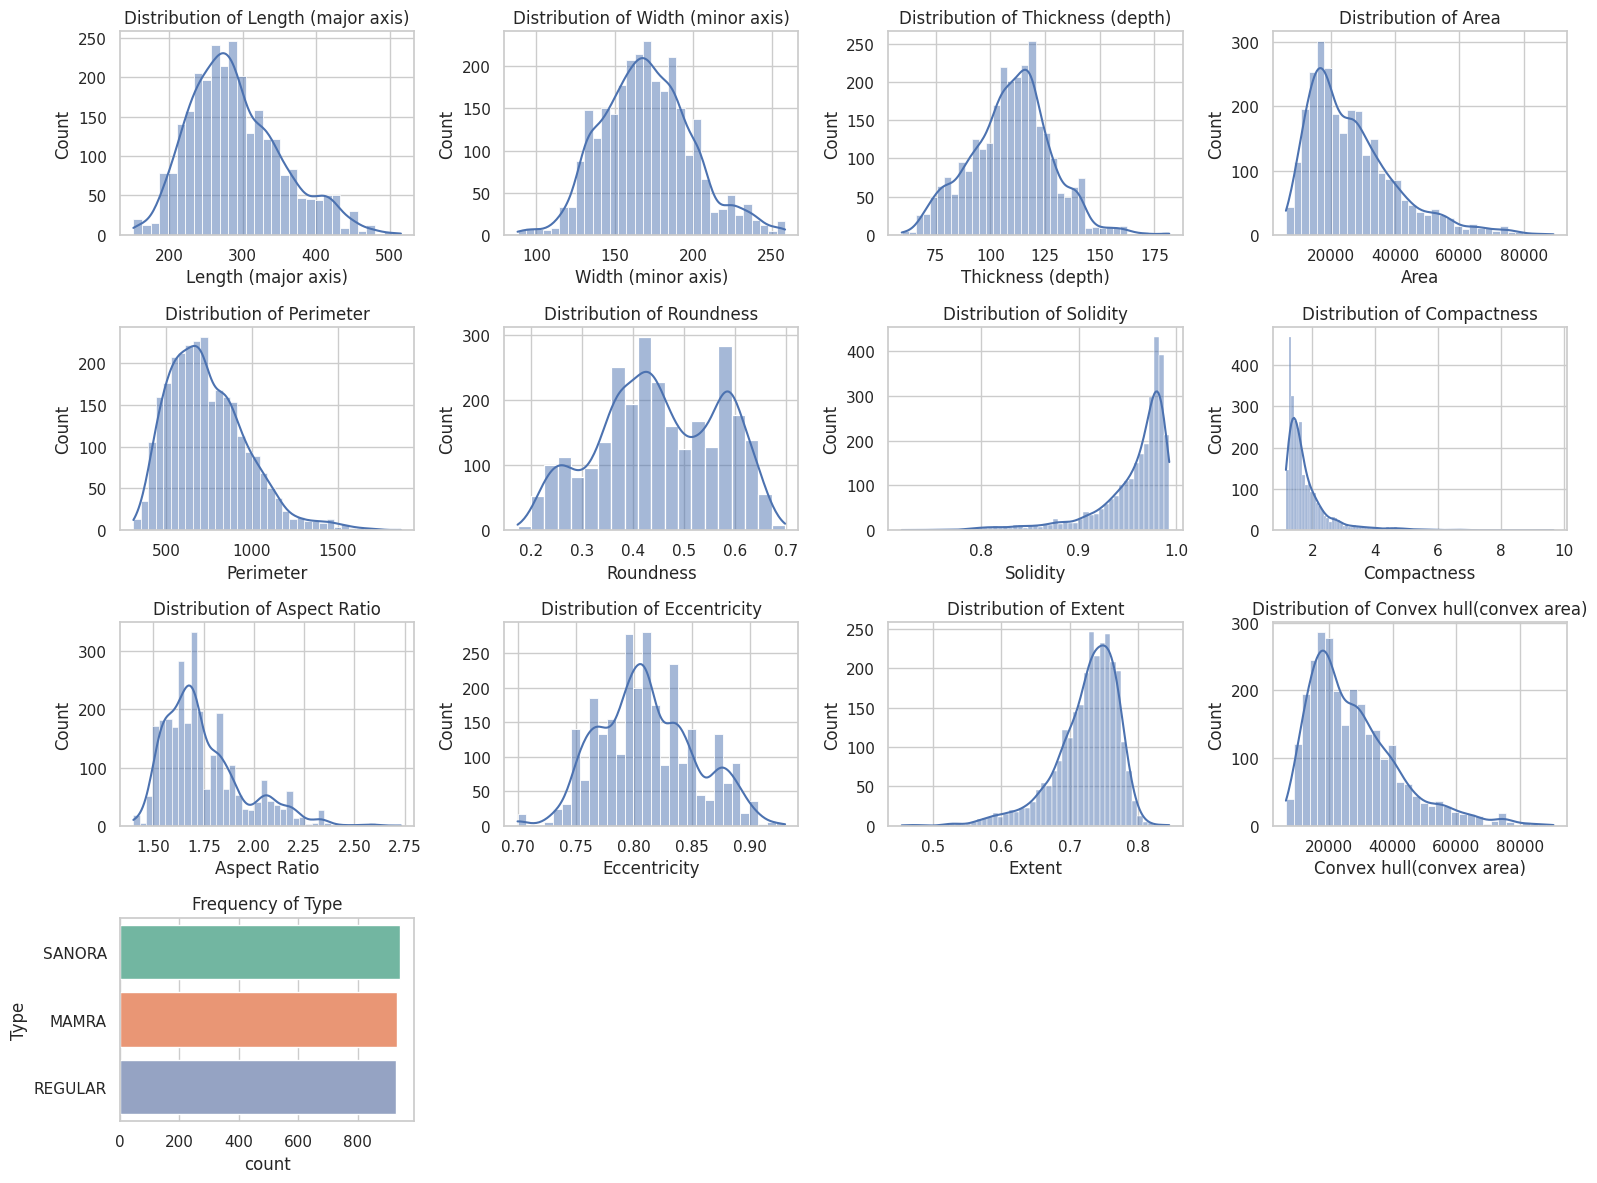

In [ ]:
plot_distributions(no_na_data)

In [ ]:
def count_outliers(data, IQR_and_Zscore=False):
    outlier_counts = pd.DataFrame(index=data.columns, columns=['Z-score Outliers', 'IQR Outliers'] if IQR_and_Zscore else ['IQR Outliers'])

    for col in data.select_dtypes(include=[np.number]).columns:
        # IQR method
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        iqr_outliers = np.sum((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))

        if IQR_and_Zscore:
            # Z-score method
            z_scores = np.abs(stats.zscore(data[col].dropna()))
            z_outliers = np.sum(z_scores > 3)

            outlier_counts.loc[col] = [z_outliers, iqr_outliers]
        else:
            outlier_counts.loc[col] = iqr_outliers

    return outlier_counts

In [ ]:
count_outliers(no_na_data, True) # calculate the outliers for each feature

,Z-score Outliers,IQR Outliers
Length (major axis),7,25
Width (minor axis),3,28
Thickness (depth),8,42
Area,44,87
Perimeter,38,61
Roundness,0,0
Solidity,74,208
Compactness,74,209
Aspect Ratio,16,138
Eccentricity,0,7


We note that there are much more outliers detected using the IQR. This is due to IQR being less sensitive on the distribution of the data. Z-Score assumes a normal distribution and is therefore more sensitive if the distributions are skew. We will thus use IQR to remove any outliers by replacing them with the median value of the respective feature.

In [ ]:
# function to clean the data
def clean_outliers(data):
    # handle outliers
    for col in data.select_dtypes(include=[np.number]).columns:
        # Calculate Q1, Q3, and IQR
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

        # Replace outliers with the median
        median = data[col].median()
        data.loc[(data[col] < lower_bound) | (data[col] > upper_bound), col] = median

    return data

In [ ]:
data_clean = clean_outliers(no_na_data.copy())
print(count_outliers(data_clean))

                         IQR Outliers
Length (major axis)                 5
Width (minor axis)                 12
Thickness (depth)                   5
Area                               43
Perimeter                           8
Roundness                           0
Solidity                          130
Compactness                       128
Aspect Ratio                       30
Eccentricity                        0
Extent                             52
Convex hull(convex area)           36
Type                              NaN
